# EDA — Penguins (seaborn)

Generated notebook with a structured Exploratory Data Analysis (EDA).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [3]:
df = sns.load_dataset('penguins')

## Quick peek

In [4]:
print('Shape:', df.shape)
display(df.head())


Shape: (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Info and summary statistics

In [5]:
print('\nInfo:')
display(df.info())

print('\nDescribe:')
display(df.describe(include='all'))



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


None


Describe:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


## Missing values and basic cleaning suggestions

In [6]:
missing = df.isnull().sum().sort_values(ascending=False)
display(missing[missing>0])

print('\nPercentage missing:')
display((df.isnull().mean()*100).sort_values(ascending=False).head(10))


sex                  11
bill_depth_mm         2
bill_length_mm        2
flipper_length_mm     2
body_mass_g           2
dtype: int64


Percentage missing:


sex                  3.197674
bill_depth_mm        0.581395
bill_length_mm       0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
island               0.000000
species              0.000000
dtype: float64

## Univariate analysis (distributions)

Numeric columns: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Categorical columns: ['species', 'island', 'sex']


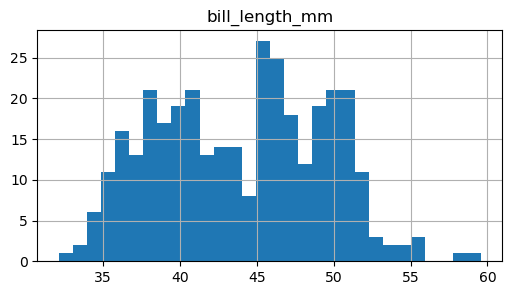

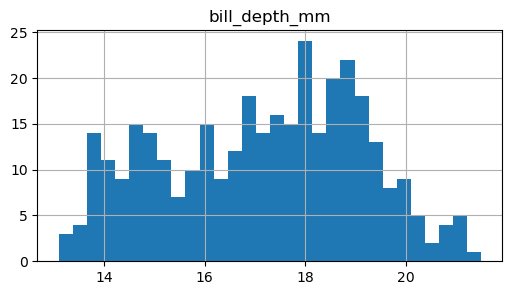

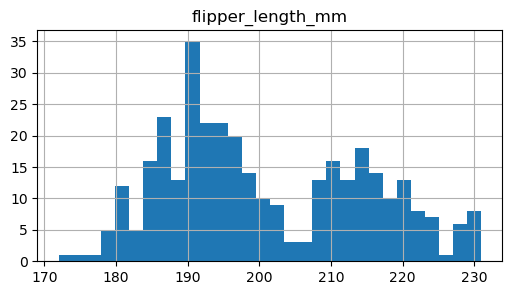

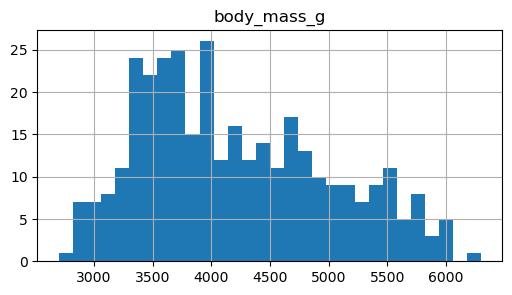

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

sex
Male      168
Female    165
Name: count, dtype: int64

<Figure size 600x300 with 0 Axes>

<Figure size 600x300 with 0 Axes>

<Figure size 600x300 with 0 Axes>

In [7]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()
print('Numeric columns:', numeric_cols)
print('Categorical columns:', cat_cols)

for col in numeric_cols:
    try:
        plt.figure(figsize=(6,3))
        df[col].hist(bins=30)
        plt.title(col)
        plt.show()
    except Exception as e:
        print('Could not plot', col, e)

for col in cat_cols:
    try:
        plt.figure(figsize=(6,3))
        display(df[col].value_counts().head(15))
    except Exception as e:
        print('Could not show counts for', col, e)


## Bivariate analysis (pairs / boxplots / groupby)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


Pairplot error: Cannot take a larger sample than population when 'replace=False'


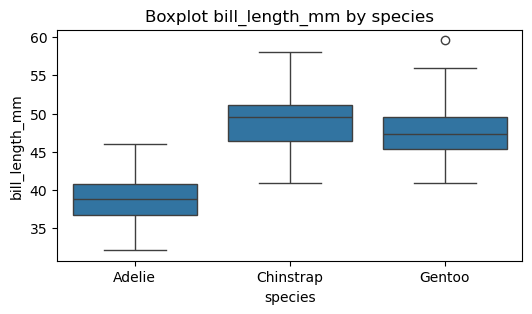

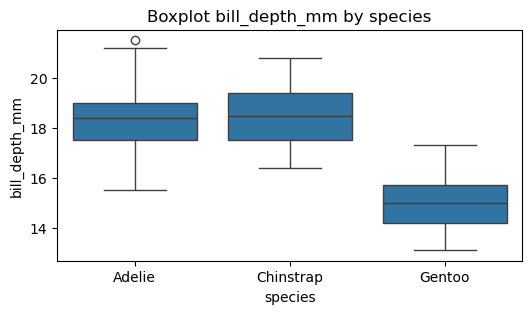

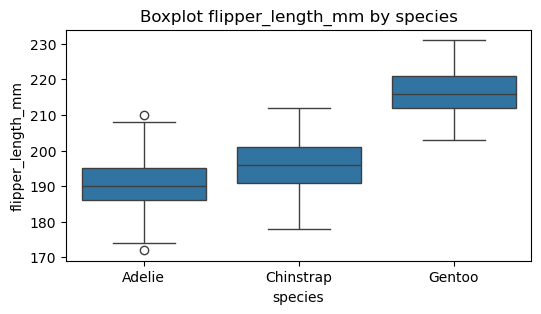

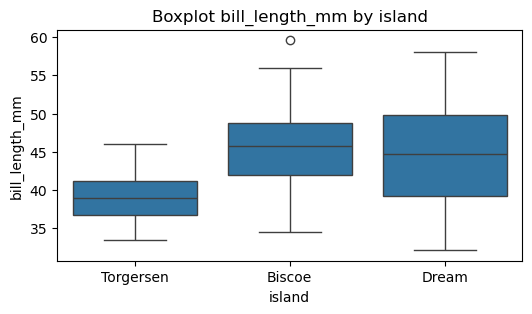

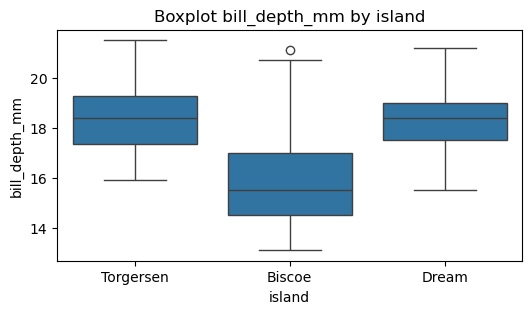

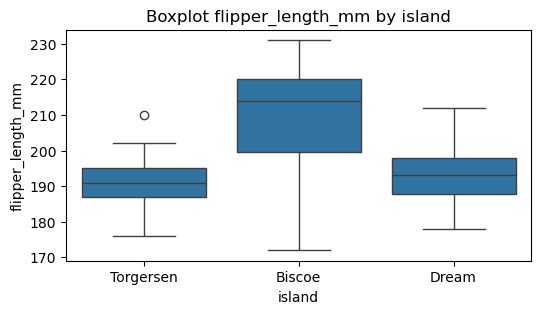

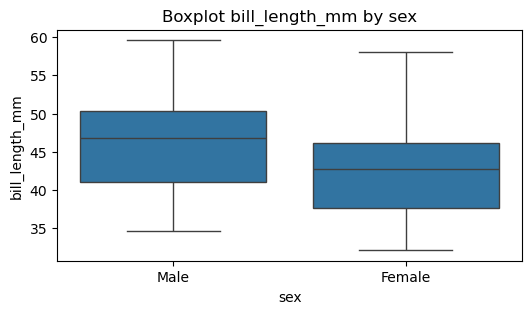

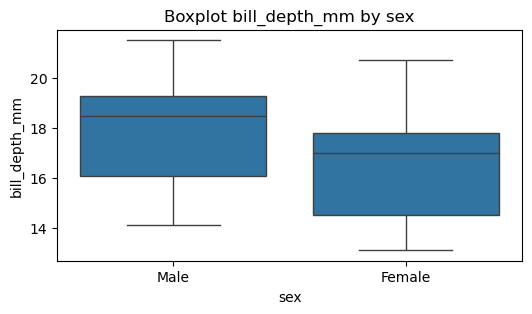

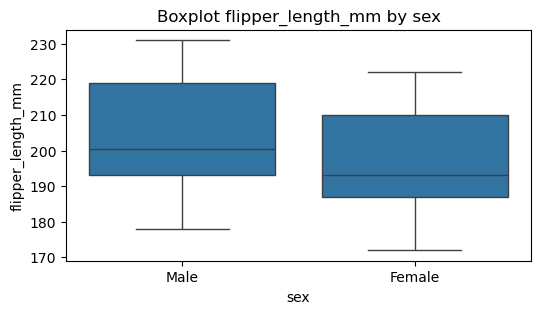

In [ ]:
if len(numeric_cols) >= 2:
    try:
        display(df[numeric_cols].corr())
        sns.pairplot(df[numeric_cols].dropna().sample(min(500, len(df))))
    except Exception as e:
        print('Pairplot error:', e)

if len(cat_cols) > 0 and len(numeric_cols)>0:
    for c in cat_cols[:3]:
        for n in numeric_cols[:3]:
            try:
                plt.figure(figsize=(6,3))
                sns.boxplot(x=c, y=n, data=df)
                plt.title(f'Boxplot {n} by {c}')
                plt.show()
            except Exception as e:
                print('Boxplot error for', c, n, e)


## Correlation heatmap (numeric features)

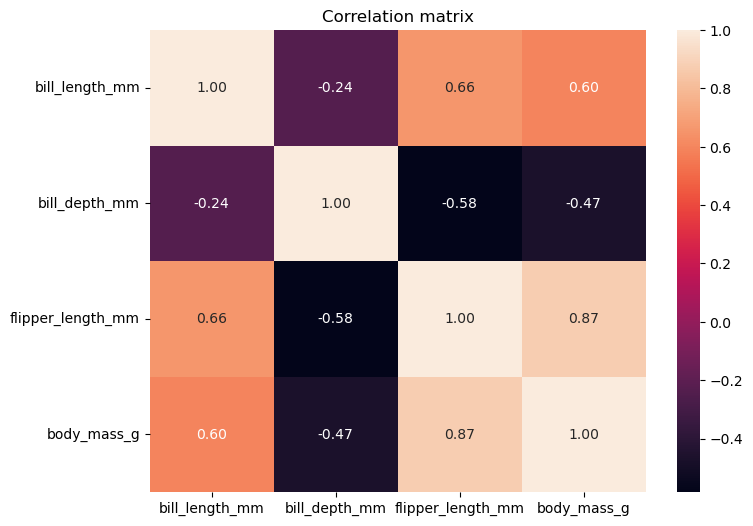

In [9]:
if len(numeric_cols)>0:
    try:
        plt.figure(figsize=(8,6))
        sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f')
        plt.title('Correlation matrix')
        plt.show()
    except Exception as e:
        print('Heatmap error:', e)


## Target column: `species` analysis

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

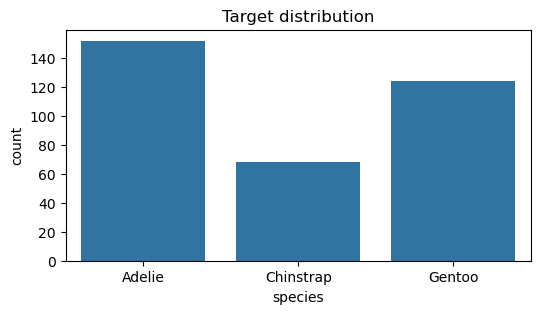

In [10]:
if 'species' in df.columns:
    display(df['species'].value_counts(dropna=False))
    try:
        plt.figure(figsize=(6,3))
        sns.countplot(x=df['species'])
        plt.title('Target distribution')
        plt.show()
    except Exception as e:
        print('Target plot error:', e)


## Summary & next steps

- Summarize obvious issues (missing data, outliers, needed encodings).
- Suggest simple preprocessing: imputation, encoding categorical variables, scaling numeric features.
